## Двухслойная нейронная сеть на numpy

'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


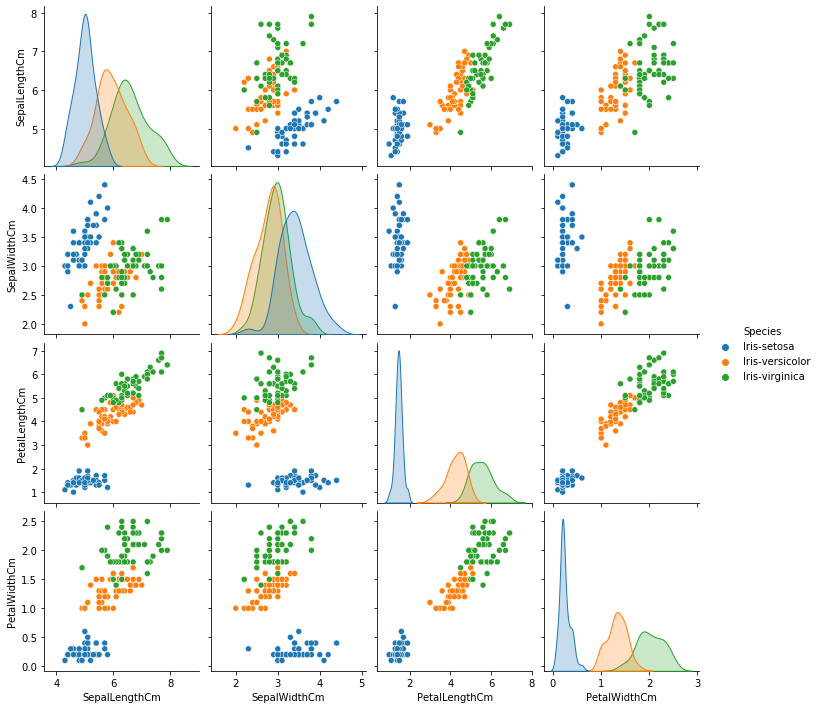

In [4]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

In [5]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [6]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(50000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

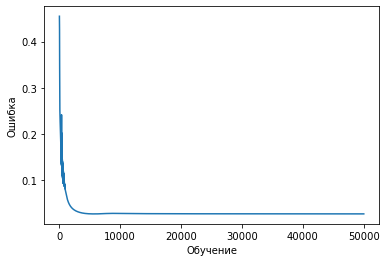

Точность нейронной сети 97.29%


In [8]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [9]:
def learn(n_neur2, learning_rate, n_iters):
    ### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
    w0 = 2*np.random.random((4, n_neur2)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((n_neur2, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
    n = learning_rate

# массив для ошибок, чтобы потом построить график
    errors = []

# процесс обучения
    for i in range(n_iters): #100,000

    # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
    
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    plt.title(f'{n_neur2, learning_rate, n_iters}', loc='left')
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()
        
    return accuracy

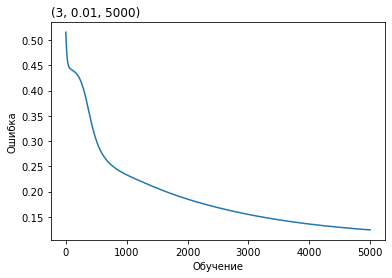

87.5752157682178

In [10]:
learn(3, 0.01, 5000)

In [19]:
result = {'accuracy': [], 'n_neur2': [], 'learning_rate': [], 'n_iters': []}

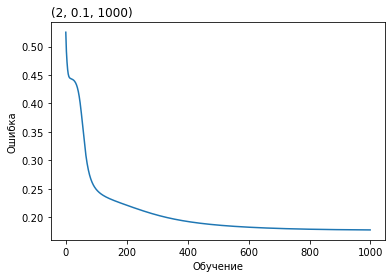

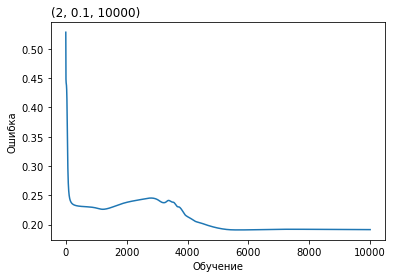

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


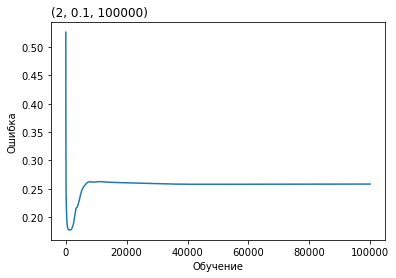

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


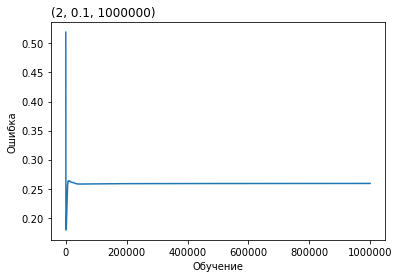

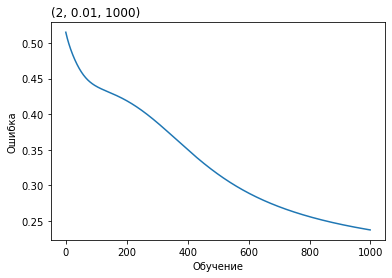

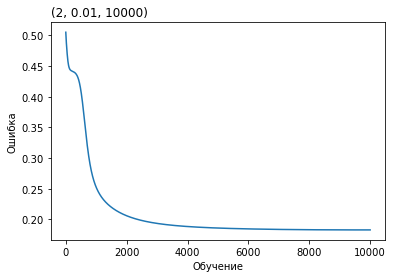

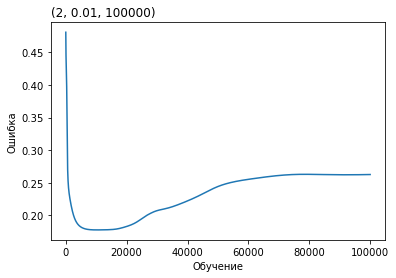

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


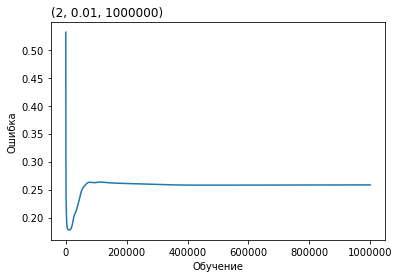

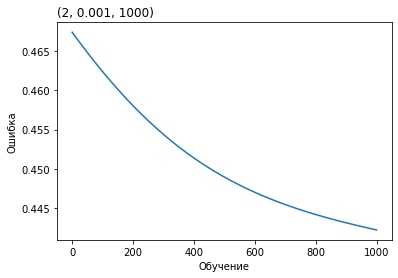

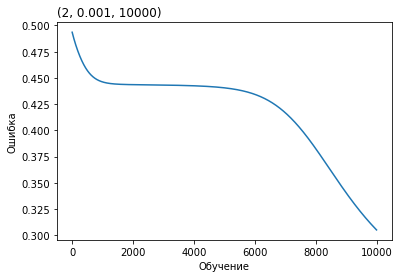

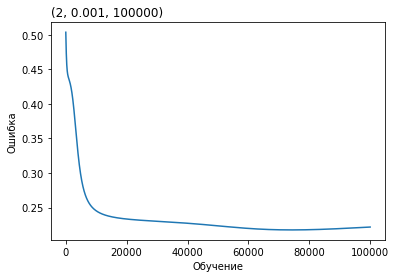

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


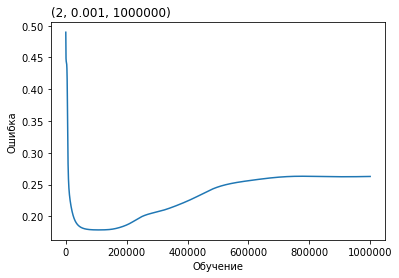

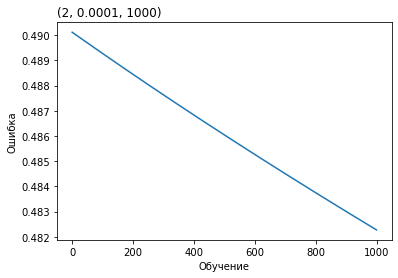

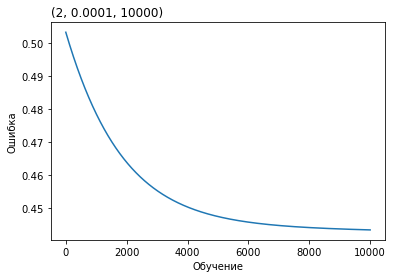

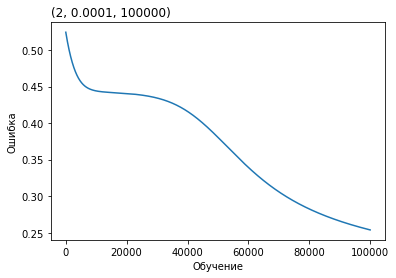

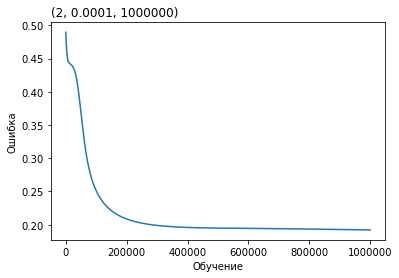

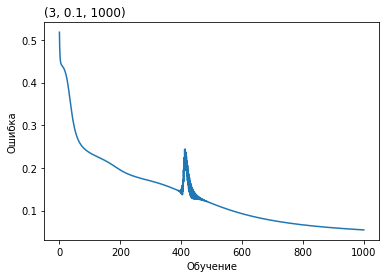

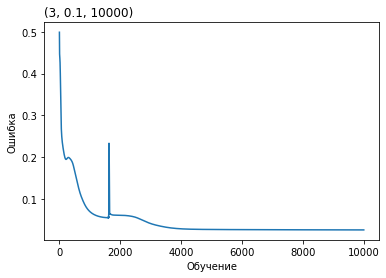

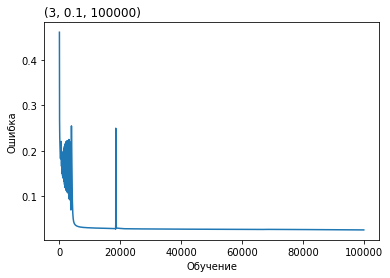

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


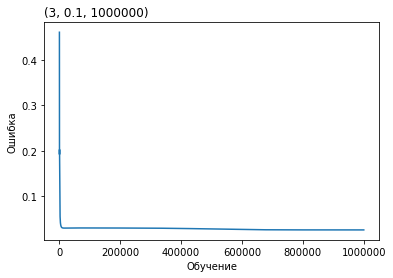

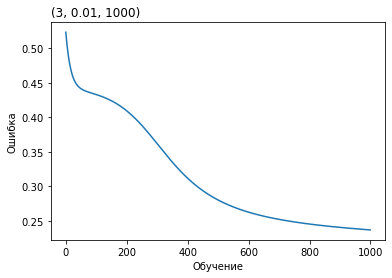

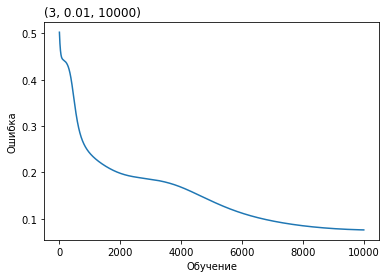

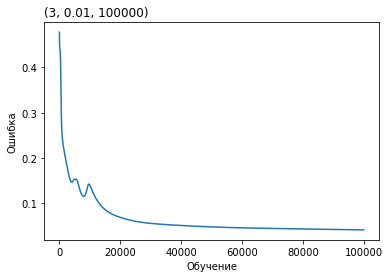

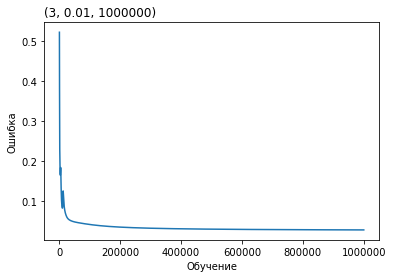

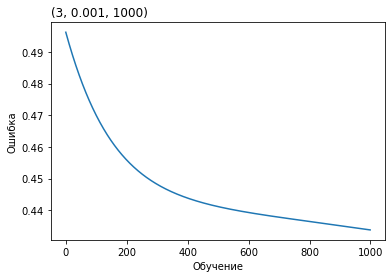

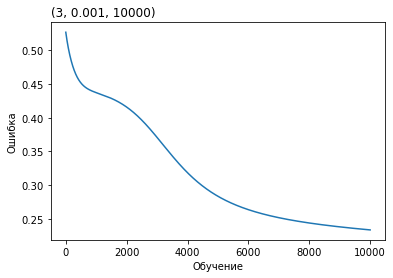

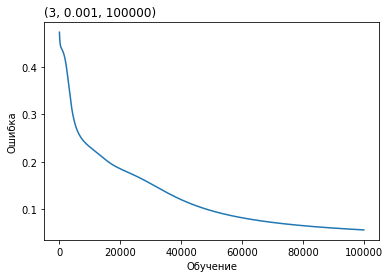

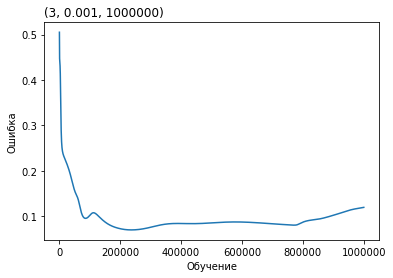

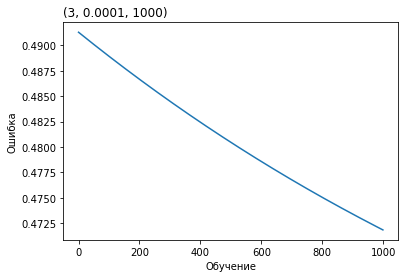

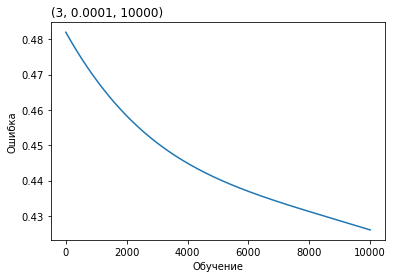

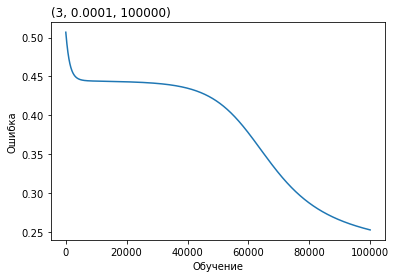

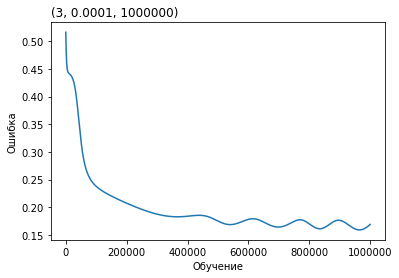

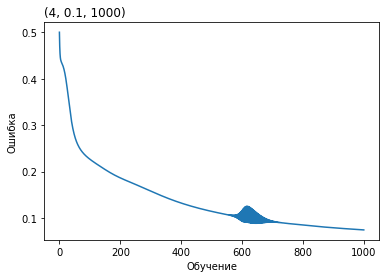

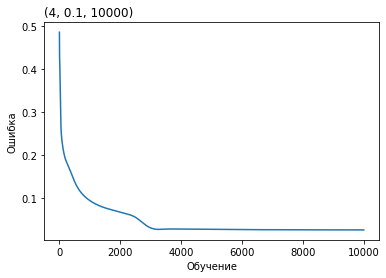

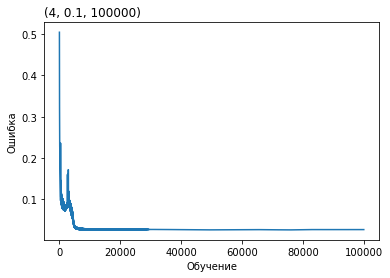

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


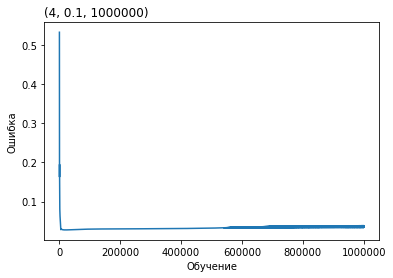

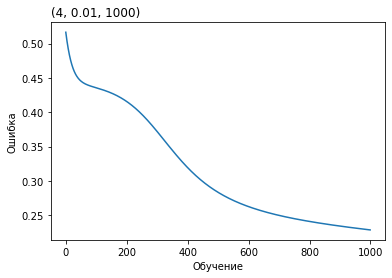

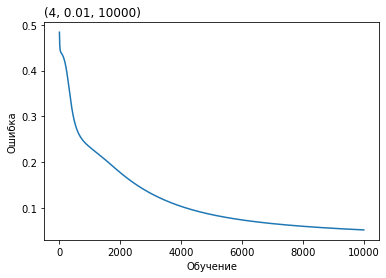

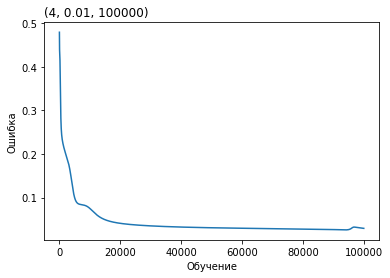

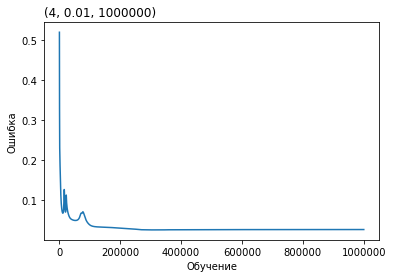

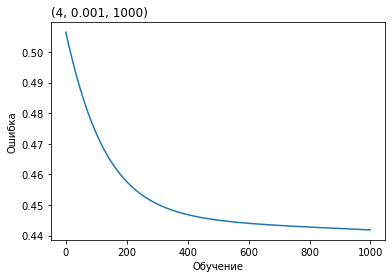

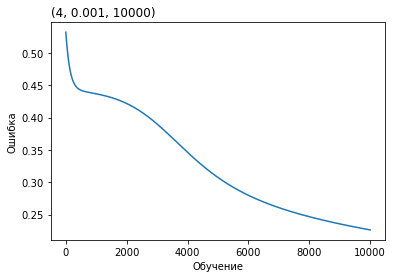

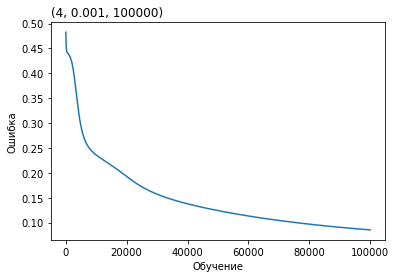

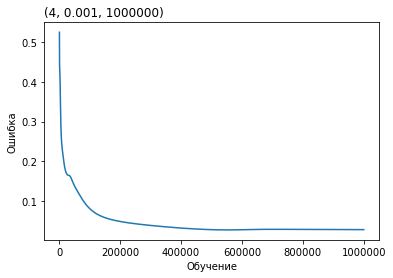

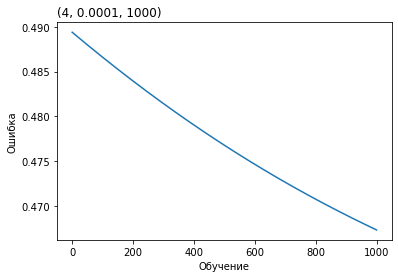

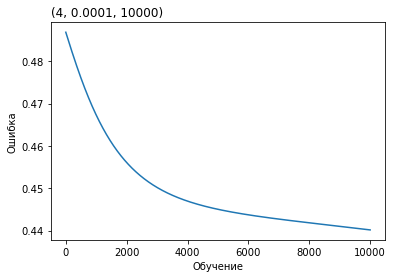

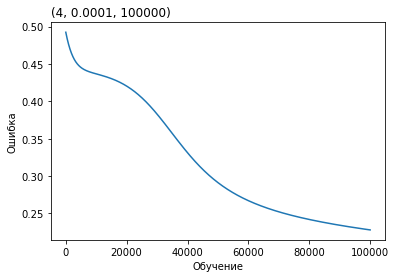

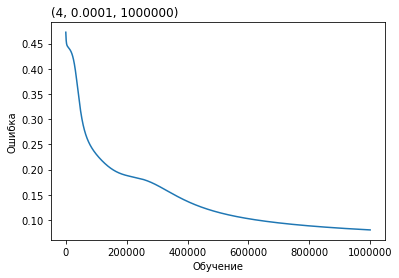

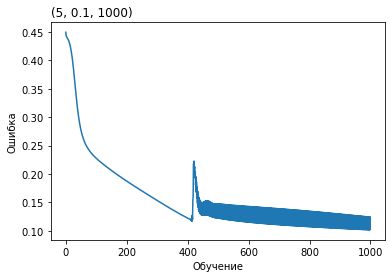

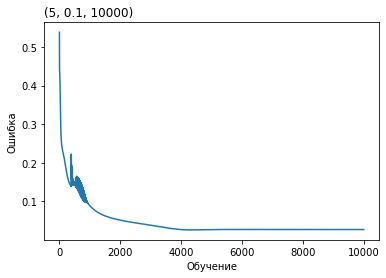

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


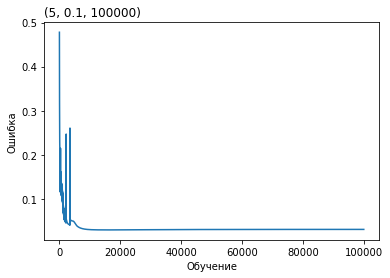

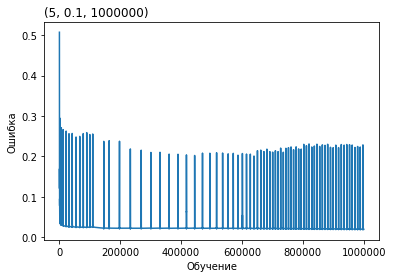

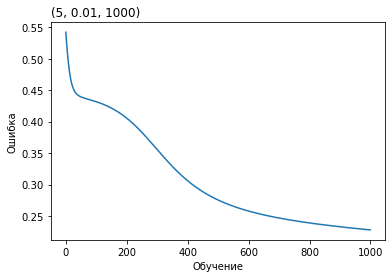

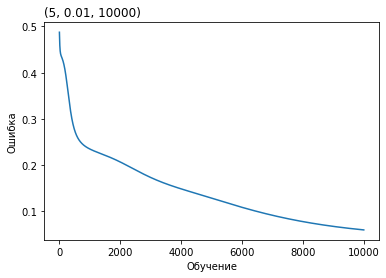

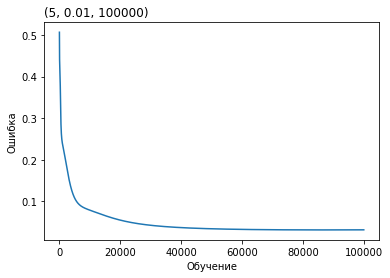

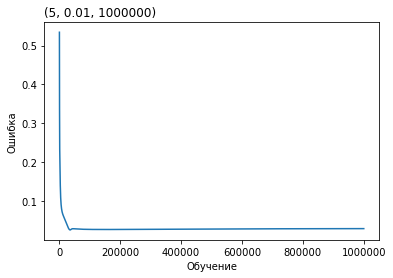

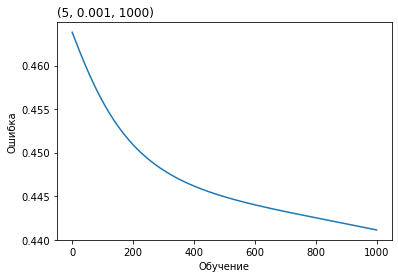

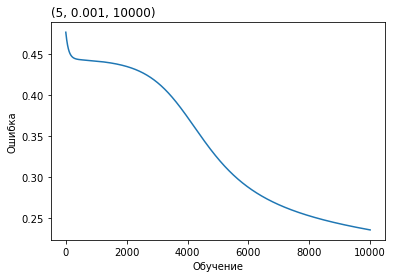

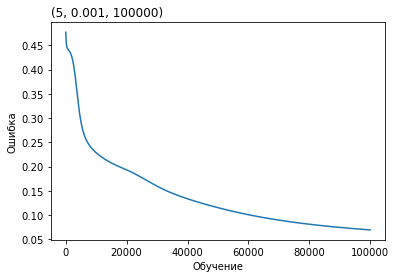

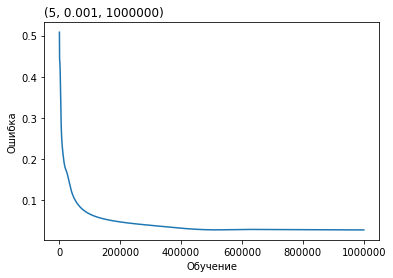

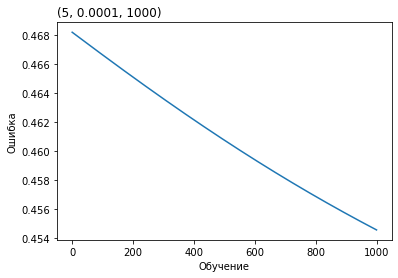

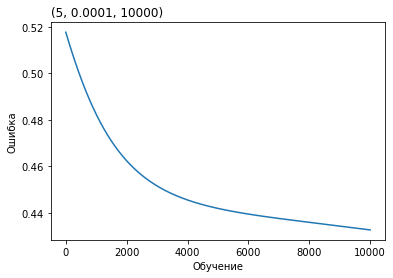

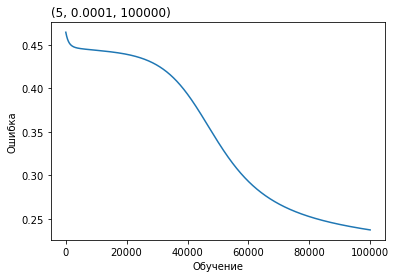

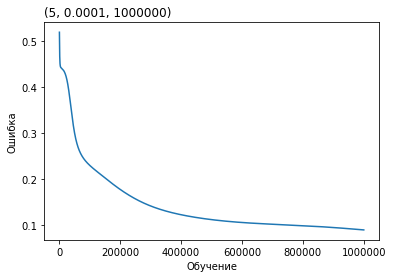

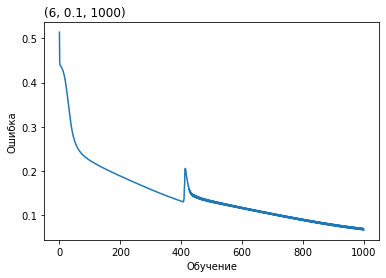

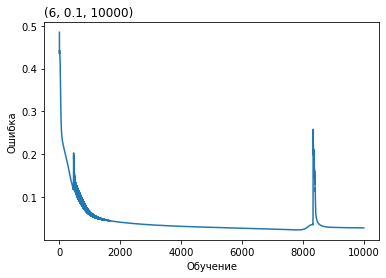

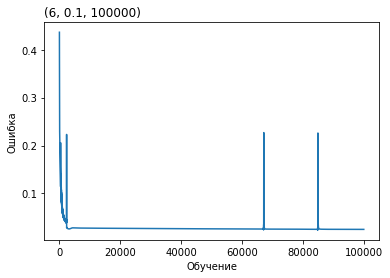

C:\Users\edive\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


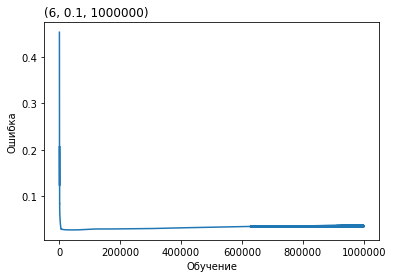

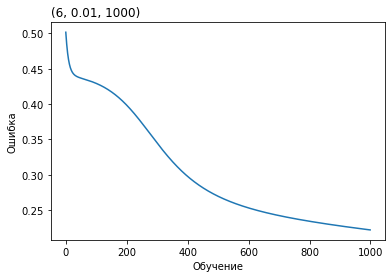

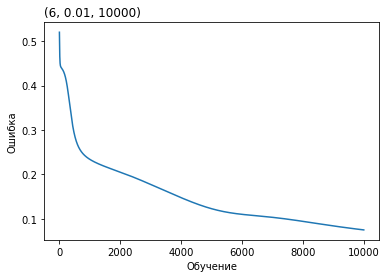

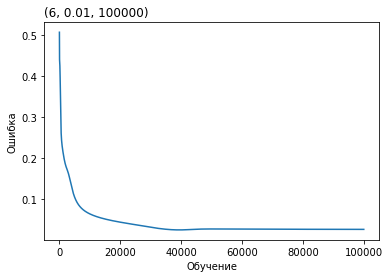

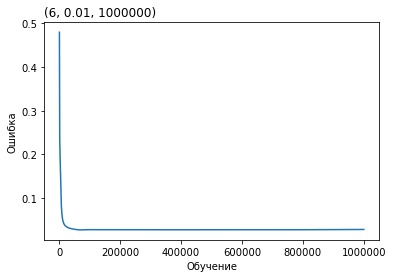

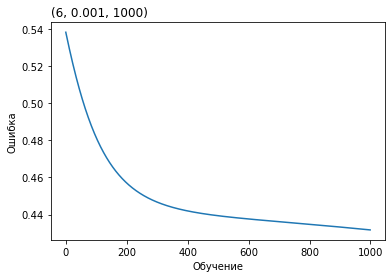

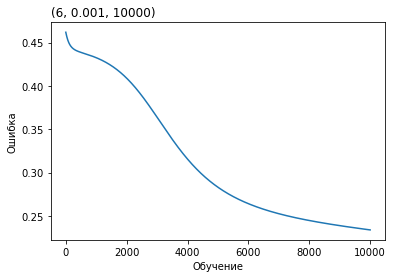

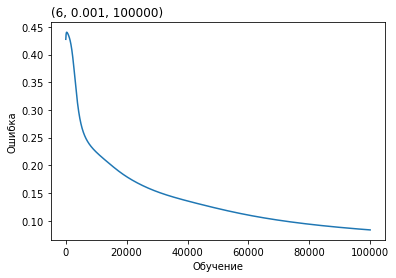

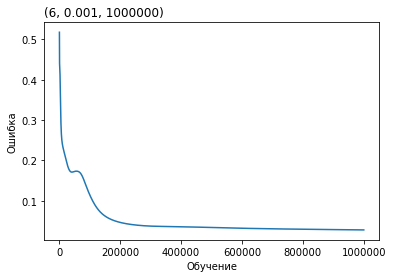

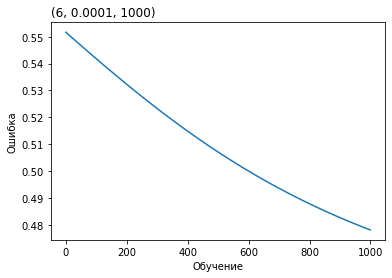

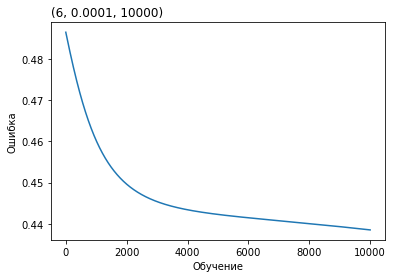

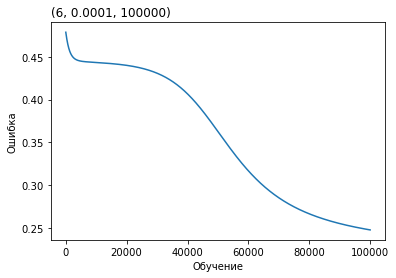

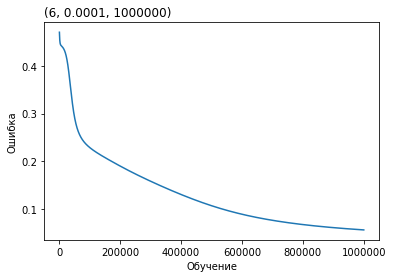

In [20]:
for i in [2, 3, 4, 5, 6]:
    for lr in [0.1, 0.01, 0.001, 0.0001]:
        for it in [1000, 10000, 100000, 1000000]:
            accuracy = learn(i, lr, it)
            result['accuracy'].append(accuracy)
            result['n_neur2'].append(i)
            result['learning_rate'].append(lr)
            result['n_iters'].append(it)

In [22]:
result_df = pd.DataFrame(result)

In [23]:
result_df.head(5)

,accuracy,n_neur2,learning_rate,n_iters
0,82.218921,2,0.10,1000
1,80.851061,2,0.10,10000
2,74.169275,2,0.10,100000
3,74.098829,2,0.10,1000000
4,76.294197,2,0.01,1000


In [24]:
result_df[result_df['accuracy'] >= 90].sort_values('accuracy', ascending=False)

,accuracy,n_neur2,learning_rate,n_iters
51,98.009598,5,0.1000,1000000
66,97.511805,6,0.1000,100000
18,97.471871,3,0.1000,100000
17,97.459837,3,0.1000,10000
39,97.399462,4,0.0100,1000000
19,97.383877,3,0.1000,1000000
33,97.322961,4,0.1000,10000
49,97.304702,5,0.1000,10000
34,97.275294,4,0.1000,100000
70,97.262797,6,0.0100,100000


In [25]:
top_20 = result_df[result_df['accuracy'] >= 90].sort_values('accuracy', ascending=False).head(20)

In [27]:
top_20.columns[1:]

Index(['n_neur2', 'learning_rate', 'n_iters'], dtype='object')

In [33]:
for column in top_20.columns[1:]:
    print(f'В колонке {column} среднее значение из Топ20 - {top_20[column].mean():.2f}')

В колонке n_neur2 среднее значение из Топ20 - 4.60
В колонке learning_rate среднее значение из Топ20 - 0.05
В колонке n_iters среднее значение из Топ20 - 487000.00
